In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/cours_python/FSCI2610/projet/Finale/NEAT

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet/Finale/NEAT


In [ ]:
!pip install neat_python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df=pd.read_csv('voice_data.csv')
df.head()
print("Nombre total d'individus:", int(df.Group.count()))
df.Group.unique()

Nombre total d'individus: 108


array(['ASD', 'SLI', 'IC', 'TD'], dtype=object)

In [ ]:
#On spécifie l'étude 1 ou l'étude 2
etude=2 #ou 2
ctrl_data = None

#Pour l'étude #1, on exclu le groupe 'IC' et 'SLI'
if etude == 1:
  #on exclu le groupe 'IC' et 'SLI'
  ctrl_data = df.loc[(df.Group != 'IC') & (df.Group != 'SLI')]
  print(f"Les groupes d'individus pour l'étude no. {etude} sont: {ctrl_data.Group.unique()}")
  print(f"Le nombre d'individus pour chaque type est: \n{ctrl_data.Group.value_counts()}")
else:
  #Pour l'etude #2, on inclu tous les individus
  ctrl_data = df.copy()
  print(f"Les groupes d'individus pour l'étude no. {etude} sont: {ctrl_data.Group.unique()}")
  print(f"Le nombre d'individus pour chaque type est: \n{ctrl_data.Group.value_counts()}")

#On renomme le group 'TD' à 'CTRL'
ctrl_data.loc[ctrl_data.Group == "TD", "Group"] = "CTRL"

#Pour l'étude no. 2, on doit renommer aussi le group 'IC' et 'SLI' à 'CTRL'
if etude == 2:
  #Pour l'étude #2, on renomme le group 'IC' et 'SLI'.  on a déjà renommer le groupe 'TD' ci-haut.
  ctrl_data.loc[ctrl_data.Group == "IC", "Group"] = "CTRL"
  ctrl_data.loc[ctrl_data.Group == "SLI", "Group"] = "CTRL"

y =ctrl_data["Group"]
print(f"\nLes individus du groupe pour l'étude no. {etude} sont: ", y.unique())
print(f"Le nombre d'individus pour chaque type sont: \n{ctrl_data.Group.value_counts()}")

#Pour les characteristiques, on inclus les 4 characteristiques suivante:
#print("\ctrl_data est:\n",ctrl_data)
X = ctrl_data.loc[:,['avg_F1', 'jitter_s', 'shimmer', 'mean_hnr']]

print("\nLes valeures 'y' sont:\n", y.value_counts())

print(f"\nLes valeurs de X sont:\n{X.count()}")
X

Les groupes d'individus pour l'étude no. 2 sont: ['ASD' 'SLI' 'IC' 'TD']
Le nombre d'individus pour chaque type est: 
Group
ASD    38
IC     25
TD     24
SLI    21
Name: count, dtype: int64

Les individus du groupe pour l'étude no. 2 sont:  ['ASD' 'CTRL']
Le nombre d'individus pour chaque type sont: 
Group
CTRL    70
ASD     38
Name: count, dtype: int64

Les valeures 'y' sont:
 Group
CTRL    70
ASD     38
Name: count, dtype: int64

Les valeurs de X sont:
avg_F1      108
jitter_s    108
shimmer     108
mean_hnr    108
dtype: int64


,avg_F1,jitter_s,shimmer,mean_hnr
0,778.00,1.205160,1.377360,10.75
1,662.70,0.560049,1.389308,12.25
2,884.55,0.722608,1.185426,12.90
3,652.05,0.045519,1.645441,8.65
4,739.75,1.151768,1.544171,8.30
...,...,...,...,...
103,858.95,0.273689,1.302515,9.75
104,1022.95,2.363517,1.299065,9.80
105,762.45,0.951328,1.517415,10.95
106,873.00,0.655506,1.264749,9.35


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
print("Explained variance ratio:",(sum(pca.explained_variance_ratio_)))

X_Scaled = StandardScaler().fit_transform(X_pca)

#Convertir les classes en valeures binaires.
y_numeric = y.map({'ASD':1, 'CTRL':0})
print("\nLe nombre de d'individus(es) pour chaque catégorie:\n\n",y_numeric.value_counts())

print("\nIndividus(es) autistique:", np.count_nonzero(y_numeric == 1))
print("Individus(es) non autistique:", np.count_nonzero(y_numeric == 0))

print("\nX:",len(X_Scaled), "\ny_numeric:", len(y_numeric), "\n\n")
X=X_Scaled
y=y_numeric
print("y:\n", y)
print("X:\n", X)

Explained variance ratio: 0.9999999999999999

Le nombre de d'individus(es) pour chaque catégorie:

 Group
0    70
1    38
Name: count, dtype: int64

Individus(es) autistique: 38
Individus(es) non autistique: 70

X: 108 
y_numeric: 108 


y:
 0      1
1      1
2      1
3      1
4      1
      ..
103    0
104    0
105    0
106    0
107    0
Name: Group, Length: 108, dtype: int64
X:
 [[-5.46995793e-01 -1.03386570e-02  3.66745546e-01  4.09173981e-01]
 [-1.35147807e+00  2.97480123e-01 -1.94470411e-01  4.43569344e-01]
 [ 1.96241800e-01  1.35270728e+00 -4.39575123e-01  5.86875553e-02]
 [-1.42560169e+00 -1.40423885e+00 -9.31115935e-01  6.66450204e-01]
 [-8.13725374e-01 -1.27570690e+00  3.20696660e-01  5.15561735e-01]
 [-7.29857137e-01  5.08326578e-01 -5.12450383e-01  4.01169544e-01]
 [-9.52268227e-01 -8.97878159e-01 -6.32780174e-01  6.41425285e-01]
 [-1.19656031e+00 -6.11836530e-02 -1.35133612e+00  3.55332149e-01]
 [-5.37858072e-01 -6.75658811e-01 -2.58386450e-01  6.61360613e-01]
 [-5.76537792

In [ ]:
import neat
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the fitness function for NEAT
def evaluate_genome(genomes, config):
    """Evaluate a list of genomes using ROC AUC for binary classification."""
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)

        # Predict on training set (get continuous predictions)
        predictions = []
        for i in range(len(X_train)):
            output = net.activate(X_train[i])
            predictions.append(output[0])  # Use raw output as continuous prediction

        # Reshape predictions to a 2D array with a single column or 1D array
        #predictions = np.array(predictions).reshape(-1, 1)

        # Compute ROC AUC and assign fitness
        auc_score = roc_auc_score(y_train, predictions) # Remove multi_class for binary
        genome.fitness = auc_score  # Fitness = ROC AUC score

# NEAT Configuration
def run_neat():
    """Runs NEAT to evolve a neural network for classification."""
    config_path = "neat_config.txt"  # Make sure you have this config file
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

    # Modify reproduction config to create a new species when extinction occurs
    #config.reproduction_config.species_elitism = 0  # Allow extinction
    #config.reproduction_config.elitism = 0  # Allow extinction of best individual
    #config.reproduction_config.min_species_size = 2  # Minimum species size to avoid extinction

    # Increase population size to promote diversity
    config.pop_size = 100 # Increased from default (usually 150)

    population = neat.Population(config)
    population.add_reporter(neat.StdOutReporter(True))

    # Run NEAT evolution generations
    winner = population.run(evaluate_genome, 200)

    # Print best genome
    print("Best genome:", winner)

    # Evaluate the best network on test data
    best_net = neat.nn.FeedForwardNetwork.create(winner, config)

    # Get continuous predictions and reshape to 2D or 1D
    predictions = [best_net.activate(x)[0] for x in X_test]
    predictions = np.array(predictions).reshape(-1, 1) # Reshape to 2D

    test_auc = roc_auc_score(y_test, predictions)
    print(f"Final test ROC AUC: {test_auc:.4f}")

    return predictions, test_auc

# Run NEAT evolution
predictions, test_auc = run_neat()

# Apply threshold to get binary predictions
predictions_binary = (predictions >= 0.5).astype(int).ravel()

# Calculate and print classification metrics
print("\nClassification report: \n")
print(classification_report(y_test, predictions_binary))

print(f"Predictions : {predictions_binary}")

cm = confusion_matrix(y_test, predictions_binary)
print("\nConfusion Matrix: \n")
print(cm)


 ****** Running generation 0 ****** 

Population's average fitness: 0.50000 stdev: 0.00000
Best fitness: 0.50000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.499, standard deviation 0.993
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    97      0.5    0.000     0
     2    0     3       --       --     0
Total extinctions: 0
Generation time: 0.210 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.49503 stdev: 0.03967
Best fitness: 0.60117 - size: (1, 1) - species 1 - id 150
Average adjusted fitness: 0.206
Mean genetic distance 1.554, standard deviation 0.876
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    65      0.6    0.246     0
     2    1    35      0.5    0.166     0
Total extinctions: 0
Generation time: 0.183 sec (0.196 average)

 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


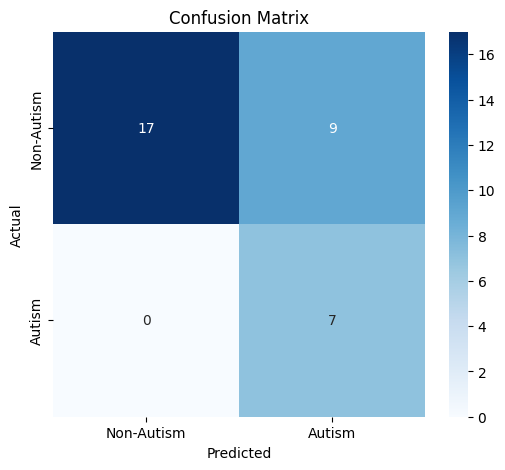

In [ ]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Autism", "Autism"], yticklabels=["Non-Autism", "Autism"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


test_auc: 
0.7988721804511278


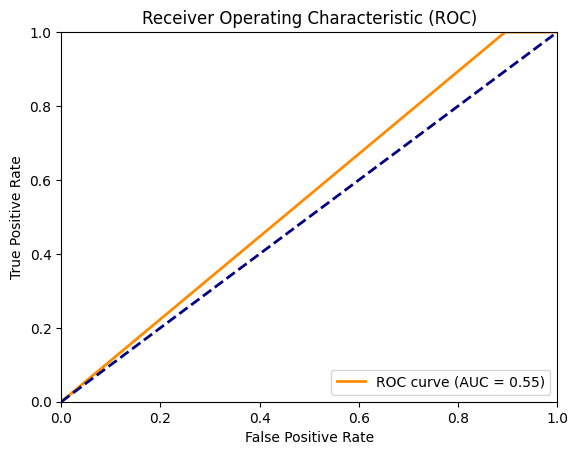

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Sample data (replace with your actual data)
#y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1])
#y_proba = np.array([0.2, 0.1, 0.8, 0.7, 0.3, 0.9, 0.4, 0.6])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_binary)

# Calculate AUC
roc_auc = auc(fpr, tpr)

print(f"test_auc: \n{test_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle

# Save the model to a file
with open("model_nn_neat.pkl", "wb") as f:
    pickle.dump(net, f)